In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#import and group all datasets 
def group_dataset():
    data_path = 'the_onion/articles_'
    df = pd.DataFrame()
    for year in range(2003, 2024):
        dfyear = pd.read_csv(data_path + str(year) + '.csv')
        df = df.append(dfyear, ignore_index=True)
    df.to_csv('the_onion/articles.csv', index=False)
    return df

#Preprocess the dataset
if not os.path.exists('the_onion/articles.csv'):
    df = group_dataset()
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    df.to_csv('the_onion/articles.csv', index=False)

In [4]:
df = pd.read_csv('the_onion/articles.csv')

In [10]:
df.head()

,0,headline,date,theme,article
0,https://www.theonion.com/debate-team-state-fin...,Debate Team State Finalists Live It Up In Supe...,2003-01-29,News,"OSHKOSH, WI—The 16 members of the Abbotsford H..."
1,https://www.theonion.com/new-movie-taps-into-n...,New Movie Taps Into Nation's Love Of Rapping K...,2003-01-29,Entertainment,"HOLLYWOOD, CA—The new Jerry Bruckheimer comedy..."
2,https://www.theonion.com/aol-time-warner-turmo...,"AOL/Time Warner Turmoil Over-Reported, Says Time",2003-01-29,News In Brief,NEW YORK—According to the Feb. 3 issue of Time...
3,https://www.theonion.com/man-totally-proud-of-...,Man Totally Proud Of Last Night's Drunken Phon...,2003-01-29,News In Brief,"ENID, OK—Andrew Colquitt expressed pride Monda..."
4,https://www.theonion.com/real-world-producers-...,Real World Producers Still Looking To Fill Eat...,2003-01-29,Entertainment,"VAN NUYS, CA—Jonathan Murray, co-executive pro..."


In [6]:
#Display length of dataset

def remove_length_outliers(df):
    df['length'] = df['article'].apply(lambda x: len(x.split(' ')))

    #Remove outliers
    max_quantile = df['length'].quantile(0.99)
    df = df[df['length'] < max_quantile]

    #Still we need to remove short articles
    df = df[df['length'] > 50]

    return df


def display_length_density(df):

    fig = sns.displot(df['length'], kde=True, bins=100)
    fig.set(xlabel='Length of article', ylabel='Count')
    fig.ax.set_title(f'Length density of articles (Total: {len(df)}))')
    #show max and min length
    fig.ax.text(0.8, 0.9, f'Max: {df["length"].max()}', transform=fig.ax.transAxes)
    fig.ax.text(0.8, 0.85, f'Min: {df["length"].min()}', transform=fig.ax.transAxes)
    plt.show()

In [7]:
#Preprocess the dataset (remove outliers)
#df = pd.read_csv('the_onion/articles.csv')
#df = remove_length_outliers(df)
#df.to_csv('the_onion/articles_processed.csv', index=False)

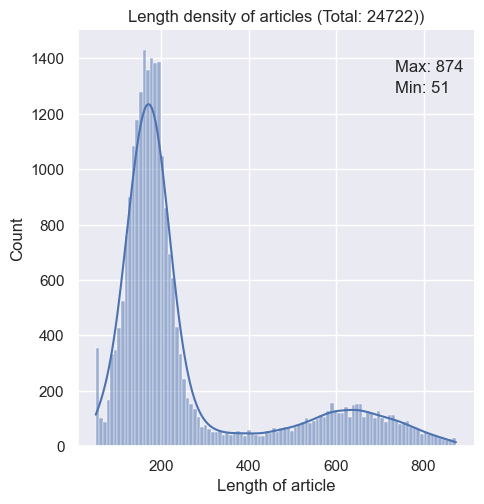

In [8]:
display_length_density(df)

In [10]:
def display_theme_density(df):
    fig = sns.displot(df['theme'], kde=True, bins=100)
    fig.set(xlabel='Theme', ylabel='Count')
    fig.ax.set_title(f'Theme density of articles (Total: {len(df)}))')
    plt.show()

In [15]:
def theme_count(df):
    #Number of different themes
    print(f'Number of different themes: {len(df["theme"].unique())}')
    print(df['theme'].value_counts())

theme_count(df)

Number of different themes: 40
News In Brief              7358
Sports                     3908
Local                      3576
Politics                   2949
News                       1645
Entertainment              1617
Infographic                1097
Commentary                  904
Slideshow                   446
American Voices             318
OGN                         308
Breaking News               187
Football                     93
News With Video              72
Basketball                   40
Podcasts                     40
Baseball                     35
Opinion                      16
Interactive                  15
Our Annual Year 2021         14
Our Annual Year 2022         13
Ask the Experts              11
Strongside/Weakside           9
Reviews                       7
Golf                          6
Featurette                    6
Podcast                       5
Gift Guide                    5
Interview                     4
Previews                      3
Special C